# Community

## Community discovery

In [44]:
!pip install --user graphtools

In [2]:
from scipy.optimize import curve_fit
from sklearn import preprocessing
from cdlib import algorithms
import itertools
from cdlib import evaluation
from collections import Counter
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph
from cdlib import viz

import random
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cdlib

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [3]:
#Import the newtwork from the edgelist and the words ranking

rank = pd.read_csv('words_ranking.csv')
G =nx.read_edgelist("word_dict.edgelist")
# G=nx.convert_node_labels_to_integers(G)  #NB: the communities change if use integers as labels

In [4]:
rank=rank.set_index('Word')

# Community Discovery algorithm(s) selection and configuration (to top)
After having defined the graph, we can select the algorithm(s) to partition it.

### Preliminar analysis

In [5]:
#Preliminar analysis of node coverage as min_size varies

a=[]
b=[]
c=[]
e=G.number_of_nodes()
alg_coms = algorithms.leiden(G)
data1=pd.DataFrame()
data1['size_comm']=alg_coms.size(summary=False)
for i in range(1,900):
    a.append(i)
    b.append(len(data1[data1['size_comm']>i]))
    d=data1[data1['size_comm']>i].sum()
    f=d[0]/e
    c.append(f)
    

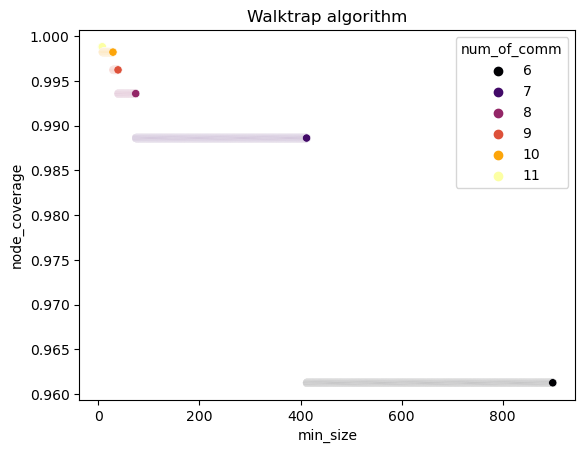

In [7]:
data2=pd.DataFrame()
data2['min_size']=a
data2['node_coverage']=c
data2['num_of_comm']=b
data2=data2[data2['min_size']>6]
sns.scatterplot(data=data2, x='min_size', y='node_coverage', hue='num_of_comm',legend='brief', palette='inferno').set_title('Walktrap algorithm')
# plt.savefig('walk_part.png')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

### Run the algorithms

In [8]:
leiden_coms = algorithms.leiden(G)

In [9]:
import networkx.algorithms.community as nx_comm
from cdlib import evaluation
nx_comm.modularity(G, leiden_coms.communities)

0.16098638106919222

# Leiden

In [10]:
len(leiden_coms.communities),leiden_coms.overlap, leiden_coms.node_coverage

(21, False, 1.0)

### Clustering Evaluation (Fitness functions) (to top)
After having obtained a network clustering we can compute several indexes upon it.

In [11]:
leiden_coms.average_internal_degree()

FitnessResult(min=1.0, max=93.84105960264901, score=9.723256273080509, std=19.248218325117577)

In [12]:
leiden_coms.average_internal_degree(summary=False)

[14.063598326359832,
 93.84105960264901,
 11.687677455990915,
 11.60096930533118,
 9.323836657169991,
 5.360178970917226,
 7.408045977011494,
 7.230769230769231,
 5.44,
 6.236559139784946,
 3.900990099009901,
 11.125,
 6.333333333333333,
 3.6363636363636362,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [13]:
evaluation.average_internal_degree(G, leiden_coms)

FitnessResult(min=1.0, max=93.84105960264901, score=9.723256273080509, std=19.248218325117577)

### Community/Statistics Visualization (to top)
CDlib allows to generate two families of predefined plots:
network/community visualizations community fitness/comparison visualizations

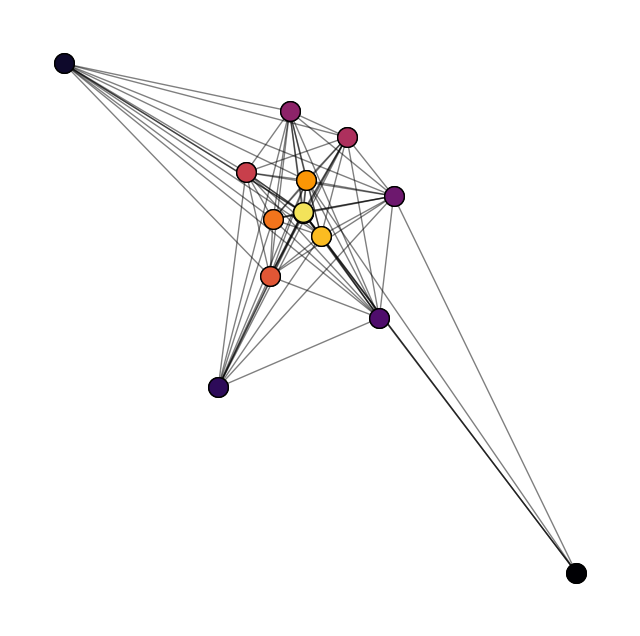

In [14]:
viz.plot_community_graph(G, leiden_coms, figsize=(8, 8), top_k=14 ,cmap='inferno_r')

In [19]:
for m in leiden_coms.communities[1]:
    print(m)

giorgia
fascisti
isabellarauti
dsantanche
forzaitalia
grazie
proprio
pure
legasalvini
cazzo
fascista
meglio
detto
basta
fate
tanto
dice
quindi
certo
vero
altro
nulla
invece
popolo
lavoro
ogni
persone
meno
cose
casa
democrazia
forse
male
forza
avere
elettorale
gente
veramente
italiano
donna
vita
nessuno
almeno
deve
visto
guidocrosetto
però
oggi
quel
credo
vedere
storia
tutte
merda
grande
capito
votato
neanche
culo
programma
governare
niente
fascismo
problema
fratelli
mondo
troppo
ditalia
nemmeno
tutta
vergogna
avanti
video
campagna
sembra
bella
davvero
idee
volete
legge
fuori
qualche
parla
fatti
vota
stata
infatti
allora
volta
schifo
paura
matteosalvinimi
vuoi
parlare
purtroppo
pensa
donne
stesso
testa
libertà
giusto
poveri
andare
state
adesso
magari
secondo
vedo
buona
punto
persona
pronti
tempo
giorno
ecco
dato
dovrebbe
milioni
primo
tanti
voterò
presidente
ragione
costituzione
italiana
dici
penso
quasi
vogliono
elettori
dare
coglioni
andate
politici
caso
poco
governato
parlamento
oltr

 ## Intra and Inter communities words 

In [25]:
#Intra-Communities words
for j in range(0, len(leiden_coms.communities)):
    l=[]
    if ((j>0)&(len(leiden_coms.communities[j])>50)):                      #select the min size of the current comm
        for k in range(0, len(leiden_coms.communities)):
            if (k!=j)&(len(leiden_coms.communities[k])>50):
                for m in leiden_coms.communities[k]:
                    for n in leiden_coms.communities[j]:
                        if G.has_edge(m,n):
                            l.append(m)
                            l.append(n)                            
                        else:pass
                dt=pd.DataFrame()
                dt['word']=l
                print(f"Intra-communities {j}-{k}")
                print(dt['word'].value_counts().nlargest(30))

Intra-communities 1-0
conte              1263
solo               1119
lega               1098
fatto              1094
calenda            1092
letta              1065
renzi              1062
meloni             1038
cosa               1030
fare               1022
bonino             1018
salvini            1002
sempre              981
carlocalenda        980
essere              968
fratelliditalia     961
anni                955
quando              947
giorgiameloni       942
senza               940
stato               937
dopo                919
governo             904
così                901
draghi              881
azioneit            849
partito             835
sinistra            789
voti                767
matteorenzi         759
Name: word, dtype: int64
Intra-communities 1-2
conte              1263
solo               1119
lega               1098
fatto              1094
calenda            1092
letta              1065
renzi              1062
meloni             1038
cosa               

Intra-communities 2-1
europa             1774
parte              1322
paese              1100
vuole              1052
italiani           1050
leuropa             866
litalia             841
putin               770
soldi               725
russia              700
guerra              660
stati               610
conte               598
solo                473
lega                470
meloni              465
letta               439
salvini             413
calenda             410
fatto               410
fratelliditalia     408
renzi               395
euro                391
sanzioni            387
bonino              369
nato                366
carlocalenda        350
draghi              343
giorgiameloni       337
anni                336
Name: word, dtype: int64
Intra-communities 2-3
europa             2063
parte              1474
paese              1199
vuole              1155
italiani           1135
leuropa             973
litalia             912
putin               829
soldi              

Intra-communities 3-2
italia          1709
politica        1651
destra          1566
elezioni        1414
settembre        702
roma             583
conte            467
lega             458
calenda          410
letta            393
meloni           380
bonino           371
candidato        366
salvini          357
candidati        349
+europa          343
centrodestra     342
giuseppe         320
renzi            320
solo             301
lista            296
europa           289
domani           275
covid            268
fatto            262
senato           260
liste            249
governo          248
carlo            248
napoli           244
Name: word, dtype: int64
Intra-communities 3-4
italia          1847
politica        1784
destra          1706
elezioni        1578
settembre        799
roma             618
conte            467
lega             458
calenda          410
candidato        408
letta            393
candidati        389
meloni           380
+europa          371
bonino 

Intra-communities 4-5
enricoletta           1900
ancora                1806
altri                 1703
pdnetwork             1494
votare                1453
elezionipolitiche     1268
partitodemocratico    1074
maio                   887
casini                 418
letta                  363
bonino                 349
lega                   320
meloni                 317
calenda                315
conte                  314
cottarelli             312
paragone               304
renzi                  296
bonelli                271
salvini                261
serracchiani           252
solo                   238
fratelliditalia        234
sanità                 231
fatto                  225
green                  215
giorgiameloni          213
pass                   208
grillo                 197
fare                   197
Name: word, dtype: int64
Intra-communities 4-6
enricoletta           1957
ancora                1840
altri                 1748
pdnetwork             1533
votare       

Intra-communities 5-8
azione             2356
molto              1693
skytg               235
ruolo               220
presente            150
vicino              149
conte               146
vivo                138
progressista        137
aspetto             135
certi               135
risposto            129
poche               121
data                120
solo                119
europa              107
necessario          103
calenda             100
settimane            96
lockdown             95
palazzo              94
fatto                89
nota                 87
dazione              86
lega                 85
cane                 83
fratelliditalia      82
nata                 82
occasione            81
renzi                81
Name: word, dtype: int64
Intra-communities 5-9
azione             2399
molto              1706
skytg               236
ruolo               221
presente            150
vicino              149
conte               146
vivo                140
progressista       

Intra-communities 7-0
voto               594
conte              162
lega                78
calenda             75
renzi               69
solo                64
fatto               64
letta               64
bonino              61
fratelliditalia     60
salvini             58
meloni              57
partito             53
nuova               53
cosa                49
giorgiameloni       49
violenza            48
promesse            47
draghi              45
essere              44
carlocalenda        44
stato               43
anni                43
seguito             41
quando              41
azioneit            41
colpo               39
fare                39
lotta               38
riforma             38
Name: word, dtype: int64
Intra-communities 7-1
voto         1407
conte         162
nuova         158
promesse      147
seguito       144
riforma       121
taglio        104
giustizia     102
propone       102
lotta         100
ricordi       100
salario        98
colpo          94
qualità

Intra-communities 8-4
prima              1981
società             241
migranti            146
volevano            142
ricchi              140
uomini              119
presi               114
mille               108
liberi              106
conte               103
dovere               98
conferma             94
porterà              93
piombino             91
fila                 88
calenda              86
morale               86
simopillon           82
finanziamenti        80
coscienza            74
rigassificatore      74
racconta             74
bonino               72
renzi                69
gratis               69
casino               67
spighissimo          66
croce                64
meloni               63
fregare              62
Name: word, dtype: int64
Intra-communities 8-5
prima              2030
società             246
migranti            148
ricchi              143
volevano            143
uomini              121
presi               114
mille               110
liberi             

bene               1907
elenabonetti        216
lucianonobili       155
serietà             152
raffaellapaita      131
teresabellanova     127
ettorerosato        110
sbaglio             107
iovototerzopolo     105
ninabecks            98
silenzio             92
piazze               87
lavorano             78
scopo                74
carlocalenda         66
azioneit             66
renzi                64
ivanscalfarotto      64
conte                63
giochi               63
calenda              59
matteorenzi          57
manda                56
italiaviva           56
permettere           56
simili               54
facilmente           50
solo                 49
albertolela          49
locali               49
Name: word, dtype: int64
Intra-communities 9-7
bene               1930
elenabonetti        219
lucianonobili       156
serietà             154
raffaellapaita      131
teresabellanova     128
ettorerosato        110
sbaglio             107
iovototerzopolo     106
ninabecks        

dire               1826
cambio              144
fake                131
condizioni          110
troll               100
messaggio            82
dipendenti           79
iovotoms             78
servizi              69
versione             44
conte                40
disposizione         38
rimangono            34
renzi                34
sanna                33
lega                 32
sussidio             31
viceversa            29
toccato              29
calenda              29
renderà              29
legittimo            28
partitino            26
fare                 25
voto                 25
fratelliditalia      24
andremo              24
letta                23
manipolare           23
produrre             23
Name: word, dtype: int64
Intra-communities 10-9
dire               1847
cambio              145
fake                132
condizioni          110
troll               100
messaggio            83
dipendenti           79
iovotoms             79
servizi              69
versione        

In [26]:
#Inter-Communities words

for j in range(0, len(leiden_coms.communities)):
    df=pd.DataFrame(leiden_coms.communities[j], columns=['word'])
    df['Count']=np.array(rank.loc[leiden_coms.communities[j]]['Count'])
    df=df.sort_values(by=['Count'], ascending=False)
    print(f"Community {j}")
    
    #Choose to print only the N most common 
    print(df.head(40))

Community 0
                word  Count
2             meloni   6743
19             conte   6327
21             letta   6138
29             renzi   5926
63           calenda   5653
14           salvini   5491
16              lega   5260
0    fratelliditalia   5138
48            bonino   4627
1      giorgiameloni   4177
3               solo   3618
6              fatto   3318
27      carlocalenda   3318
5               cosa   2623
4               fare   2608
9            governo   2489
62          azioneit   2416
23            draghi   2385
7               anni   2079
11            sempre   2075
18             stato   1937
8             essere   1915
13            quando   1904
12              così   1737
15             senza   1717
20              dopo   1701
17           partito   1682
53        italiaviva   1535
10          sinistra   1497
51       matteorenzi   1461
24              voti   1403
28            fiamma    116
89             passo    114
33              odio    111
348     

# Qualitative evaluation 

In [28]:
#hub dominance
leiden_hub = evaluation.hub_dominance(G,leiden_coms)
leiden_hub

FitnessResult(min=0.2926434923201294, max=1.0, score=0.6738652562782002, std=0.2582648057813452)

In [29]:
#expansion
leiden_exp = evaluation.expansion(G,leiden_coms)
leiden_exp

FitnessResult(min=0.0, max=73.56575212866603, score=20.41537439349337, std=18.325930241416554)

In [30]:
#Conductance
leiden_cond = evaluation.conductance(G,leiden_coms)
leiden_cond 

FitnessResult(min=0.0, max=0.9015984015984015, score=0.5437236753918503, std=0.32636603320276)

In [31]:
def community_purity(coms, nth):
    purities = []
    for c in coms.communities:
        houses = []
        for node in c:
            if node in nth:
                houses.extend(nth[node])
        
        cnt = Counter(houses)
        purity = max(cnt.values())/sum(cnt.values())
        purities.append(purity)
    return purities

In [32]:
leiden_purities = community_purity(leiden_coms, G)
leiden_purities

[0.013449986357679284,
 0.003568824915653663,
 0.009941635517083087,
 0.008473192415857752,
 0.007967692643527613,
 0.01592446448703495,
 0.013902271163110805,
 0.017800668654558597,
 0.015018636263977198,
 0.01577652337530757,
 0.017232767232767232,
 0.0233523611831863,
 0.030534351145038167,
 0.06944444444444445,
 0.5,
 0.5,
 0.5,
 0.25,
 0.5,
 0.5,
 0.25]

# Ground Truth evaluation 

In [35]:
#Fill with G number of nodes, gamma ecc.
n_nodes = nx.number_of_nodes(G)
avg_deg = sum(d for n, d in G.degree()) / float(n_nodes)
gamma=2.5
beta=1.68
g1 = LFR_benchmark_graph(n_nodes, gamma, beta, 0.1, min_community=5, average_degree=avg_deg)
g2 = LFR_benchmark_graph(n_nodes, gamma, beta, 0.3, min_community=5, average_degree=avg_deg)
g3 = LFR_benchmark_graph(n_nodes, gamma, beta, 0.5, min_community=5, average_degree=avg_deg)
g4 = LFR_benchmark_graph(n_nodes, gamma, beta, 0.7, min_community=5, average_degree=avg_deg)
g5 = LFR_benchmark_graph(n_nodes, gamma, beta, 0.9, min_community=5, average_degree=avg_deg)


names = ["mu=0.1", "mu=0.3", "mu=0.5", "mu=0.7", "mu=0.9"]
graphs = [g1, g2, g3, g4, g5]
references = []

# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden]

ExceededMaxIterations: Could not assign communities; try increasing min_community

In [36]:
# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2).set_title('LFR benchmark graph')

NameError: name 'graphs' is not defined